# Diamonds Project

In [1]:
from IPython.display import Image
Image(url='https://t3.ftcdn.net/jpg/00/50/72/28/360_F_50722853_gvXodAjPwTGQwd7BzN2EogZYsWwJ9pwf.jpg', width=700)

In [2]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 45.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fc9b0152b9b66e91dad797dea87e45a7a9928735730aa5bb5bb75296889b3f13
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
# Load data
import pandas as pd

# Display all columns without truncation
pd.set_option('display.max_columns', None)

#Let's use for pandas profiling
from IPython.display import HTML
from pandas_profiling import ProfileReport

# Math operation
import numpy as np

#For Visualize
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Dimension Reduction
from sklearn.decomposition import PCA

#Normalization
from sklearn.preprocessing import StandardScaler

#VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Statistic Model
import itertools
import statsmodels.api as sm

#Model
import xgboost as xgb
from xgboost import XGBRegressor
from scipy.stats import linregress
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Image Display
from IPython.display import Image

# Ignore warnings
import warnings as wg
wg.filterwarnings('ignore')

<ipython-input-3-a4c225fa75e1>:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
#Load dataset
df = pd.read_csv('Diamonds Prices2022.csv')

In [5]:
#Let's look at dataset
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


## · Business Understanding

### · What's the problem?
#### -----------------------------------
#### The problem is the price prediction problem. This problem is called regression problem.
####
### · How to solve this problem?
#### ---------------------------------------------
#### The problem is to predict the price of a diamond by looking at the features. We need to build a model that accepts inputs and gives us the price as an output.    
####
### · How important is this problem?
#### ----------------------------------------------------
#### Solving this problem can prevent some losses and customer loss. That is, we can predict the price of the new product by looking at the old data and set the price according to the norm. If we pay this price less, we will earn negative income. If we give too much, our customer base will decrease. In order to avoid situations like this, we find the prices in the most optimal option by means of the model.

### · Let's look at statistic:
#### -----------------------------------
#### Sales value of rough diamonds worldwide in 2021: 16.4 billion (usd).
#### Value of polished diamonds worldwide in 2021: 28 billion (usd).
#### Global diamond jewelry market value in 2021: 87 billion (usd).

## · Data Understanding

In [6]:
#Let's look at dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   x           53943 non-null  float64
 8   y           53943 non-null  float64
 9   z           53943 non-null  float64
 10  price       53943 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
#Let's look at shape of df
df.shape

(53943, 11)

In [8]:
#Let's columns
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [9]:
#Let's look at data types of columns
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [10]:
#Let's look at number of unique values
df.nunique()

Unnamed: 0    53943
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
x               554
y               552
z               375
price         11602
dtype: int64

In [11]:
#Let's look at null values counts
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

###### There are no null values in the data frame.

In [12]:
#Let's describe data frame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53943.0,26972.000000,15572.147122,1.0,13486.50,26972.00,40457.50,53943.00
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
x,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
y,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
z,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00


In [13]:
#Let's look at values counts
for i in df.columns:
    print(df[i].value_counts())
    print('==========================')

1        1
35980    1
35956    1
35957    1
35958    1
        ..
17986    1
17987    1
17988    1
17989    1
53943    1
Name: Unnamed: 0, Length: 53943, dtype: int64
0.30    2604
0.31    2249
1.01    2242
0.70    1982
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: depth, Length: 184, dtype: int64
56.0    9881
57.0    9724
58.0    8369
59.0    6573
55.0    6269
        ... 
51.6       1
63.5       1
43.

##### Pandas Profiling

In [14]:
# Let's create a profile report
profile = ProfileReport(df, title='Diamond Data Report', explorative=True)

# Generate the report
profile.to_file("data_profile_report.html")

# Let's look at html report
HTML(filename="data_profile_report.html")

## · Data Preparation

In [15]:
#Let's remove unnecesarry columns
del df['Unnamed: 0']

###### Let's visualize categorical columns

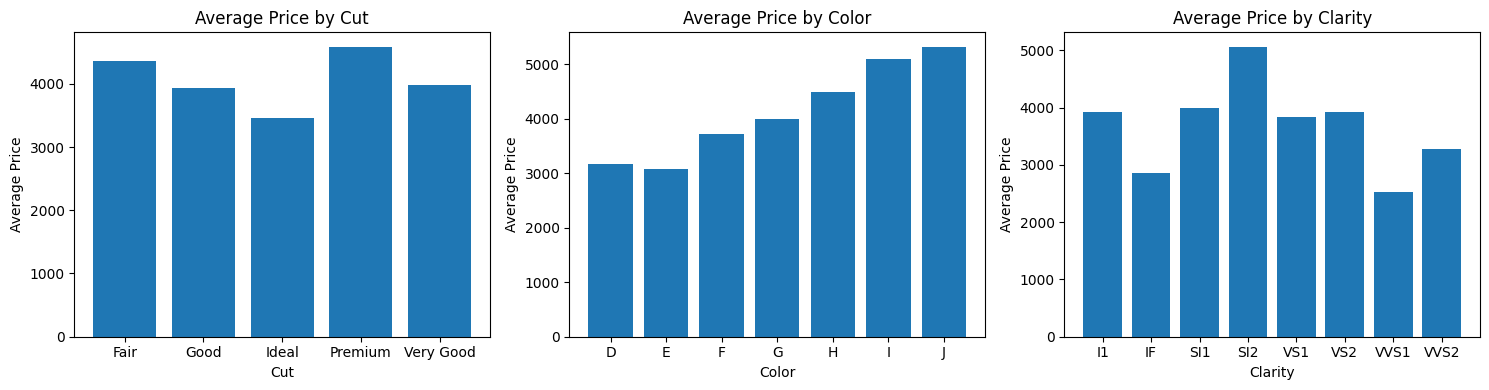

In [16]:
# List of categorical columns
categorical_columns = ['cut', 'color', 'clarity']
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 4))

for i, col in enumerate(categorical_columns):
    average_price_by_category = df.groupby(by=col)['price'].mean()
    axes[i].bar(average_price_by_category.index, average_price_by_category.values)
    axes[i].set_xlabel(col.capitalize())  # Set x-axis label
    axes[i].set_ylabel('Average Price')    # Set y-axis label
    axes[i].set_title(f'Average Price by {col.capitalize()}')
plt.tight_layout()

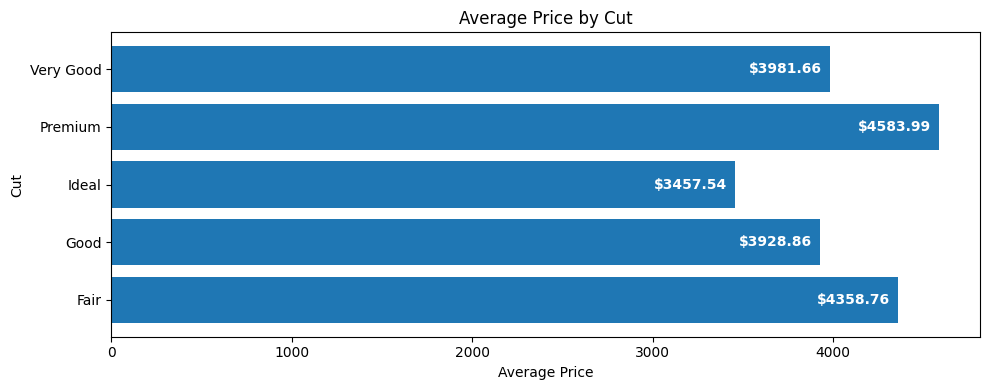

In [17]:
#Let's visualize average price of all cut types
col = 'cut'
bar_colors = ['#1f77b4']
fig, ax = plt.subplots(figsize=(10, 4))
average_price_by_category = df.groupby(by=col)['price'].mean()
categories = average_price_by_category.index
prices = average_price_by_category.values

ax.barh(categories, prices, color=bar_colors[0])
ax.set_xlabel('Average Price')
ax.set_ylabel(col.capitalize())
ax.set_title(f'Average Price by {col.capitalize()}')

for j, price in enumerate(prices):
    ax.text(price -450, j, f'${price:.2f}', va='center', fontsize=10, c = 'w', weight = 'bold')

plt.tight_layout()
plt.show()

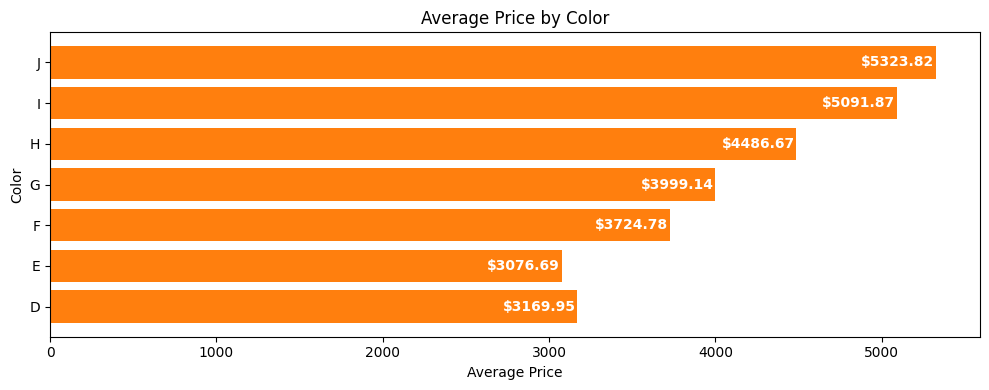

In [18]:
#Let's visualize average price of all color types
col = 'color'
bar_colors = ['#ff7f0e']
fig, ax = plt.subplots(figsize=(10, 4))
average_price_by_category = df.groupby(by=col)['price'].mean()
categories = average_price_by_category.index
prices = average_price_by_category.values

ax.barh(categories, prices, color=bar_colors[0])
ax.set_xlabel('Average Price')
ax.set_ylabel(col.capitalize())
ax.set_title(f'Average Price by {col.capitalize()}')

for j, price in enumerate(prices):
    ax.text(price -450, j, f'${price:.2f}', va='center', fontsize=10, c = 'w', weight = 'bold')

plt.tight_layout()
plt.show()

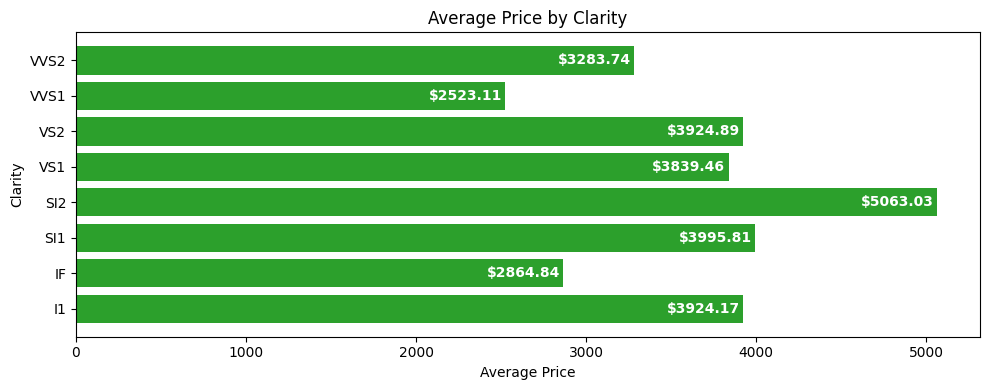

In [19]:
#Let's visualize average price of all clarity types
col = 'clarity'
bar_colors = ['#2ca02c']
fig, ax = plt.subplots(figsize=(10, 4))
average_price_by_category = df.groupby(by=col)['price'].mean()
categories = average_price_by_category.index
prices = average_price_by_category.values

ax.barh(categories, prices, color=bar_colors[0])
ax.set_xlabel('Average Price')
ax.set_ylabel(col.capitalize())
ax.set_title(f'Average Price by {col.capitalize()}')

for j, price in enumerate(prices):
    ax.text(price -450, j, f'${price:.2f}', va='center', fontsize=10, c = 'w', weight = 'bold')

plt.tight_layout()
plt.show()

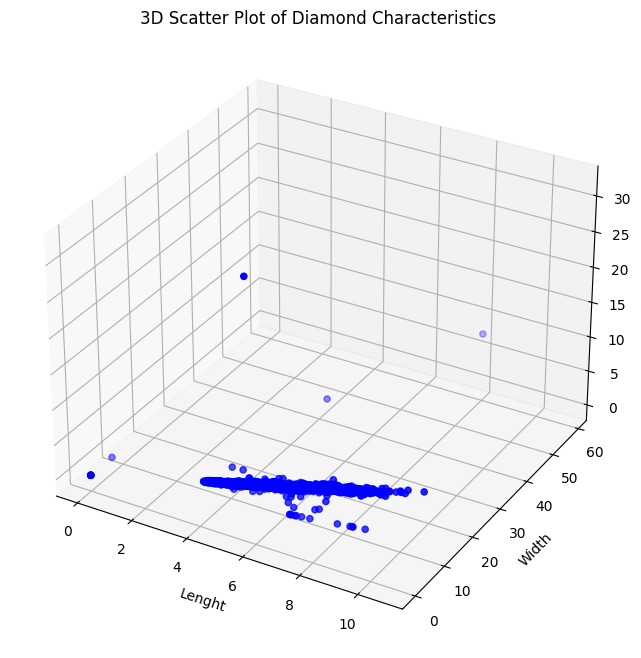

In [20]:
#Let's visualize x , y , z as 3d
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x'], df['y'], df['z'], c='b', marker='o')
ax.set_xlabel('Lenght')
ax.set_ylabel('Width')
ax.set_zlabel('Depth')
plt.title('3D Scatter Plot of Diamond Characteristics')

plt.show()

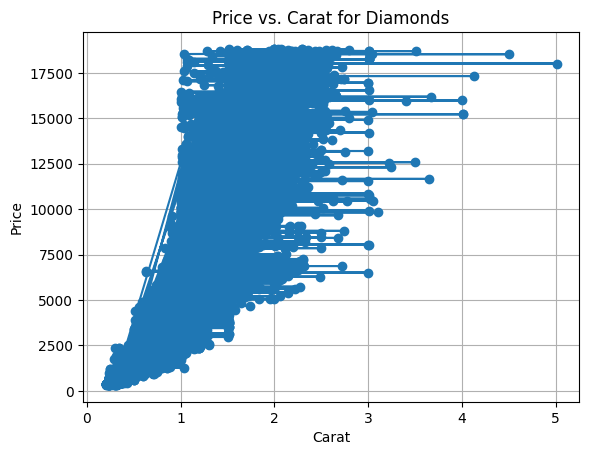

In [21]:
#Let's look at chart of price and Carat
carat_values = df['carat']
price_values = df['price']
plt.plot(carat_values, price_values, marker='o', linestyle='-')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price vs. Carat for Diamonds')
plt.grid(True)

plt.show()

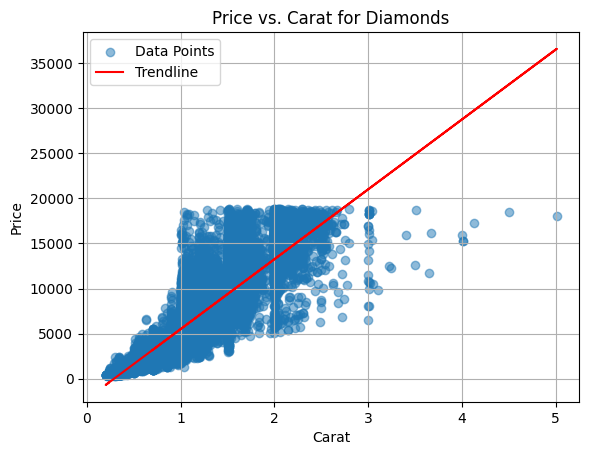

In [22]:
#Let's look at line and chart of price and Carat
carat_values = df['carat']
price_values = df['price']
slope, intercept, _, _, _ = linregress(carat_values, price_values)
regression_line = slope * carat_values + intercept
plt.scatter(carat_values, price_values, label='Data Points', marker='o', alpha=0.5)
plt.plot(carat_values, regression_line, color='red', label='Trendline')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price vs. Carat for Diamonds')
plt.legend()
plt.grid(True)

plt.show()

In [23]:
#Let's create bins of carat and look at average prices
bins = [0.1, 1.3, 2.7, 4, 5.02]
labels = ['0.1-1.3', '1.3-2.7', '2.7-4.5', '4.5+']
df['carat_bin'] = pd.cut(df['carat'], bins=bins, labels=labels)

In [24]:
#Let's find average price of bins
average_prices_by_bin = df.groupby('carat_bin')['price'].mean()
print(average_prices_by_bin)

carat_bin
0.1-1.3     2750.612690
1.3-2.7    11748.195612
2.7-4.5    14294.872340
4.5+       16864.800000
Name: price, dtype: float64


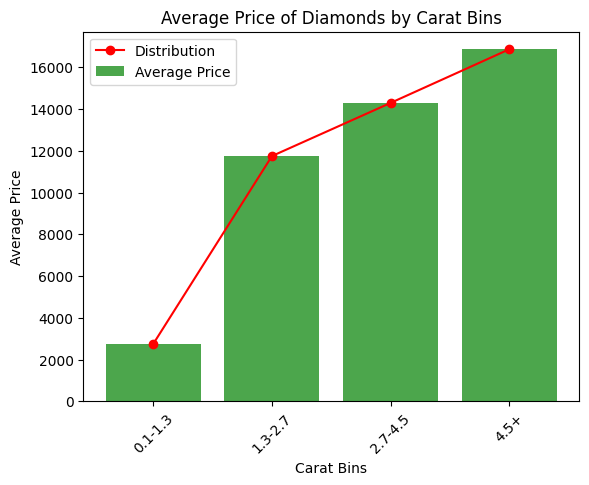

In [25]:
#Let's look at chart average price and Carat bins
carat_bins = list(average_prices_by_bin.keys())
average_prices = list(average_prices_by_bin.values)
# Create a bar chart
plt.bar(carat_bins, average_prices, color='green', alpha=0.7, label='Average Price')
# Create a line plot to show the distribution
plt.plot(carat_bins, average_prices, marker='o', linestyle='-', color='red', label='Distribution')
plt.xlabel('Carat Bins')
plt.ylabel('Average Price')
plt.title('Average Price of Diamonds by Carat Bins')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [26]:
#Let's create bins of Depth and look at average prices
bins = [42.0, 50.0 , 57.0, 64.0, 80.0]
labels = ['42.0-50.0', '50.0-57.0', '57.0-64.0', '64.0+']
df['depth_bin'] = pd.cut(df['depth'], bins=bins, labels=labels)

In [27]:
#Let's find average price of bins
average_prices_by_depthbin = df.groupby('depth_bin')['price'].mean()
print(average_prices_by_depthbin)

depth_bin
42.0-50.0    4148.000000
50.0-57.0    3863.495192
57.0-64.0    3915.764683
64.0+        4410.720321
Name: price, dtype: float64


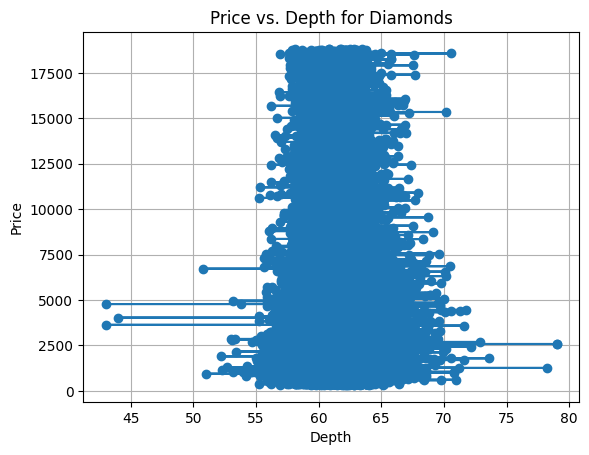

In [28]:
#Let's look at chart of price and depth
depth_values = df['depth']
price_values = df['price']
plt.plot(depth_values, price_values, marker='o', linestyle='-')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.title('Price vs. Depth for Diamonds')
plt.grid(True)

plt.show()

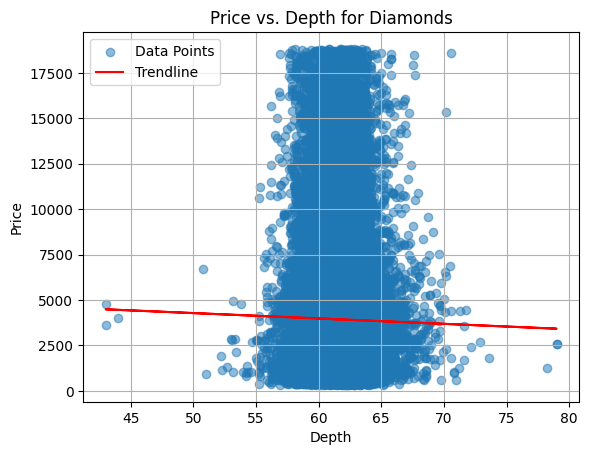

In [29]:
#Let's look at line and chart of price and Carat
depth_values = df['depth']
price_values = df['price']
slope, intercept, _, _, _ = linregress(depth_values, price_values)
regression_line = slope * depth_values + intercept
plt.scatter(depth_values, price_values, label='Data Points', marker='o', alpha=0.5)
plt.plot(depth_values, regression_line, color='red', label='Trendline')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.title('Price vs. Depth for Diamonds')
plt.legend()
plt.grid(True)

plt.show()

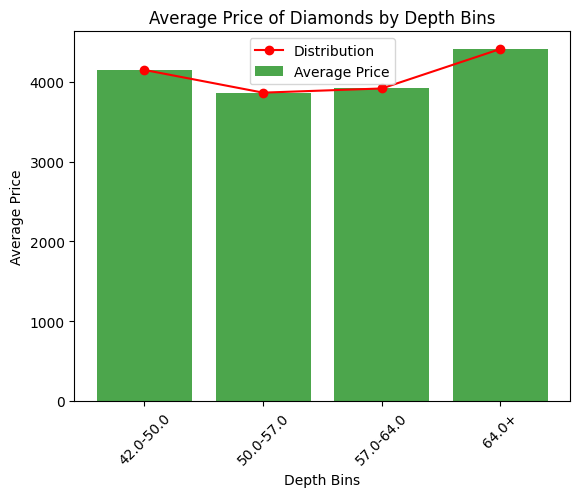

In [30]:
#Let's look at chart average price and depth bins
depth_bins = list(average_prices_by_depthbin.keys())
average_depths_pr = list(dict(average_prices_by_depthbin).values())
plt.bar(depth_bins, average_depths_pr, color='green', alpha=0.7, label='Average Price')
plt.plot(depth_bins, average_depths_pr, marker='o', linestyle='-', color='red', label='Distribution')
plt.xlabel('Depth Bins')
plt.ylabel('Average Price')
plt.title('Average Price of Diamonds by Depth Bins')
plt.xticks(rotation=45)
plt.legend()

plt.show()

###### Let's examine 'table' column:

###### In a diamond dataset, the 'table' column typically represents the table percentage of a diamond. The table percentage is a measurement that indicates the size of the flat, top surface (the table) of the diamond relative to the overall diameter of the diamond. It is expressed as a percentage.
###### The 'table' value in the dataset is the table percentage for each diamond. It provides information about how the diamond is cut and can affect its appearance and quality. Different diamond cuts and styles may have different ideal table percentages for maximum brilliance and sparkle.
###### Mathematically, the table percentage is calculated as:

In [31]:
Image(url='https://www.torresjewelco.com.au/media/wysiwyg/edu_depth-1.png', width = 650)

In [32]:
#Let's create bins of Table and look at average prices
bins = [42.0, 56.0 , 69.0, 82.0, 96.0]
labels = ['42.0-56.0','56.0-69.0', '69.0-82.0', '82.0+']
df['table_bin'] = pd.cut(df['table'], bins=bins, labels=labels)

In [33]:
#Let's find average price of bins
average_prices_by_tablebin = df.groupby('table_bin')['price'].mean()
print(average_prices_by_tablebin)

table_bin
42.0-56.0     3227.523455
56.0-69.0     4345.075859
69.0-82.0     2783.625000
82.0+        13387.000000
Name: price, dtype: float64


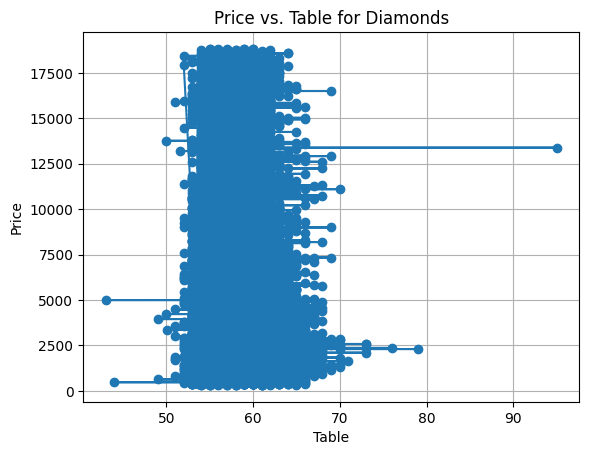

In [34]:
#Let's look at chart of price and table
table_values = df['table']
price_values = df['price']
plt.plot(table_values, price_values, marker='o', linestyle='-')
plt.xlabel('Table')
plt.ylabel('Price')
plt.title('Price vs. Table for Diamonds')
plt.grid(True)

plt.show()

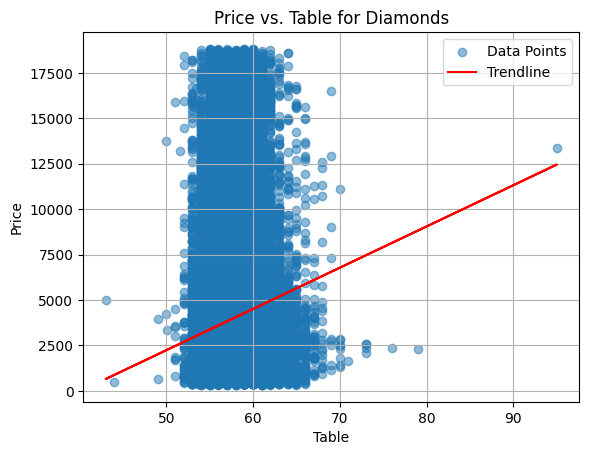

In [35]:
#Let's look at line and chart of price and Carat
table_values = df['table']
price_values = df['price']
slope, intercept, _, _, _ = linregress(table_values, price_values)
regression_line = slope * table_values + intercept
plt.scatter(table_values, price_values, label='Data Points', marker='o', alpha=0.5)
plt.plot(table_values, regression_line, color='red', label='Trendline')
plt.xlabel('Table')
plt.ylabel('Price')
plt.title('Price vs. Table for Diamonds')
plt.legend()
plt.grid(True)

plt.show()

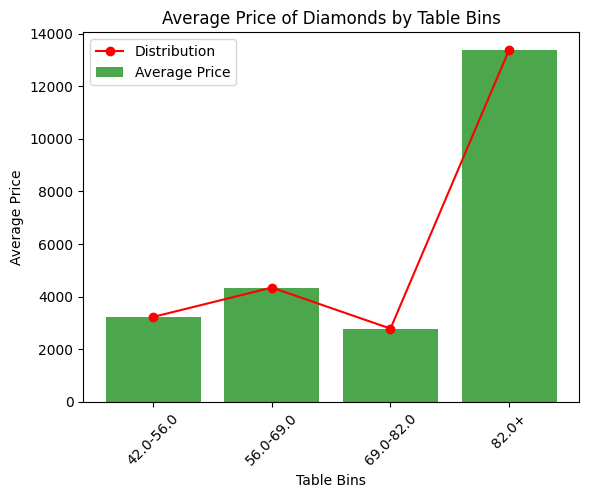

In [36]:
#Let's look at chart average price and depth bins
table_bins = list(average_prices_by_tablebin.keys())
average_tables_pr = list(dict(average_prices_by_tablebin).values())
plt.bar(table_bins, average_tables_pr, color='green', alpha=0.7, label='Average Price')
plt.plot(table_bins, average_tables_pr, marker='o', linestyle='-', color='red', label='Distribution')
plt.xlabel('Table Bins')
plt.ylabel('Average Price')
plt.title('Average Price of Diamonds by Table Bins')
plt.xticks(rotation=45)
plt.legend()

plt.show()

## Data Preprocessing

In [37]:
#Let's look at first 5 rows again
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,carat_bin,depth_bin,table_bin
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326,0.1-1.3,57.0-64.0,42.0-56.0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326,0.1-1.3,57.0-64.0,56.0-69.0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327,0.1-1.3,50.0-57.0,56.0-69.0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334,0.1-1.3,57.0-64.0,56.0-69.0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335,0.1-1.3,57.0-64.0,56.0-69.0


In [38]:
#dtypes
df.select_dtypes('object').dtypes

cut        object
color      object
clarity    object
dtype: object

In [39]:
#Let's select only object dtype features
df.select_dtypes("object").nunique()

cut        5
color      7
clarity    8
dtype: int64

In [40]:
#Let's look at unique values
for i in df.select_dtypes("object"):
    print(i,df[i].unique())

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [41]:
#Let's look at average price cut category
df.groupby(by = 'cut')['price'].mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4583.992605
Very Good    3981.658529
Name: price, dtype: float64

##### Let's order by average price:
##### [Ideal,Good,Very Good,Fair,Premium]

#### 1. Manual

In [42]:
#Let's replace cut category with number
map_dict = {'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5}
df['cut_num'] = df['cut'].map(map_dict)

#### 2. Dummies

In [43]:
#Let's get dummies from cut columns
df = pd.get_dummies(df , columns = ['cut'])

In [44]:
#Let's examine next column: Color Column
df.groupby(by = 'color')['price'].mean()

color
D    3169.954096
E    3076.687111
F    3724.784868
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

#### 1. Manual

In [45]:
#Let's divide color which is greater than 4000 and is lower than 4000
df['two_sep_color'] = df['color'].apply(lambda x: 1 if x in ['H','I','J'] else 0)

#### 2. Dummies

In [46]:
#Let's get dummies from color columns
df = pd.get_dummies(df , columns = ['color'])

In [47]:
#Let's change representation
for i in df.select_dtypes('bool'):
    df[i] = df[i].astype('int')

In [48]:
#Let's examine next column: Color Column
df.groupby(by = 'clarity')['price'].mean()

clarity
I1      3924.168691
IF      2864.839106
SI1     3995.811357
SI2     5063.028606
VS1     3839.455391
VS2     3924.894119
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64

#### 1. Manual

In [49]:
#Let's divide color which is greater than 3900 and is lower than 3900
df['two_sep_clarity'] = df['clarity'].apply(lambda x: 1 if x in ['I1','SI1','SI2','VS2'] else 0)

#### 2. Dummies

In [50]:
#Let's get dummies from clarity columns
df = pd.get_dummies(df , columns = ['clarity'])

### Feature Engineering

In [51]:
#First 5 row
df.head()

,carat,depth,table,x,y,z,price,carat_bin,depth_bin,table_bin,cut_num,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,two_sep_color,color_D,color_E,color_F,color_G,color_H,color_I,color_J,two_sep_clarity,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0.1-1.3,57.0-64.0,42.0-56.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0.1-1.3,57.0-64.0,56.0-69.0,5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,0.1-1.3,50.0-57.0,56.0-69.0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0.1-1.3,57.0-64.0,56.0-69.0,5,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,0.1-1.3,57.0-64.0,56.0-69.0,2,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0


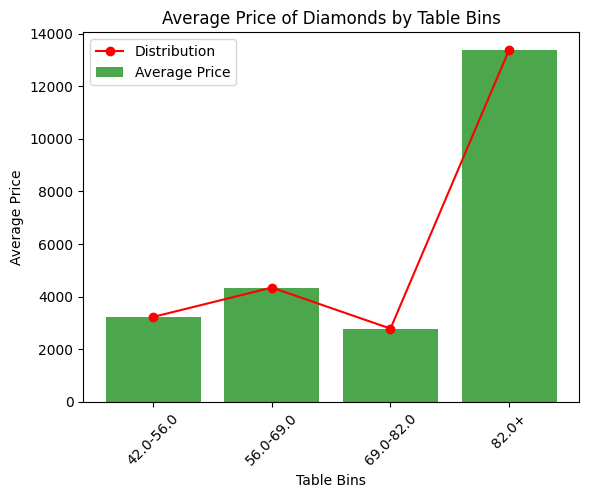

In [52]:
#Let's look at chart average price and table bins
table_bins = list(average_prices_by_tablebin.keys())
average_tables_pr = list(dict(average_prices_by_tablebin).values())
plt.bar(table_bins, average_tables_pr, color='green', alpha=0.7, label='Average Price')
plt.plot(table_bins, average_tables_pr, marker='o', linestyle='-', color='red', label='Distribution')
plt.xlabel('Table Bins')
plt.ylabel('Average Price')
plt.title('Average Price of Diamonds by Table Bins')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [53]:
#Let's create new features
df['table_flat'] = df['table'].apply(lambda x: 0 if x < 82.0 and x > 69.0 else 1)

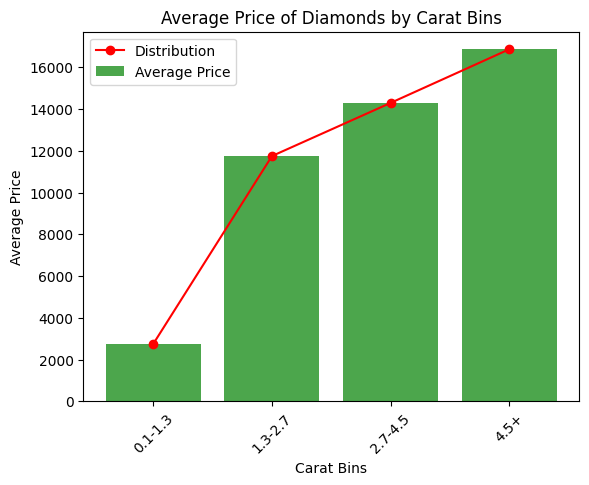

In [54]:
##Let's look at chart average price and Carat bins
carat_bins = list(average_prices_by_bin.keys())
average_prices = list(average_prices_by_bin.values)
# Create a bar chart
plt.bar(carat_bins, average_prices, color='green', alpha=0.7, label='Average Price')
# Create a line plot to show the distribution
plt.plot(carat_bins, average_prices, marker='o', linestyle='-', color='red', label='Distribution')
plt.xlabel('Carat Bins')
plt.ylabel('Average Price')
plt.title('Average Price of Diamonds by Carat Bins')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [55]:
#Let's create new features
map_dict1 = {'0.1-1.3':1,'1.3-2.7':2,'2.7-4.5':3,'4.5+':4}
df['carat_label'] = df['carat_bin'].map(map_dict1)

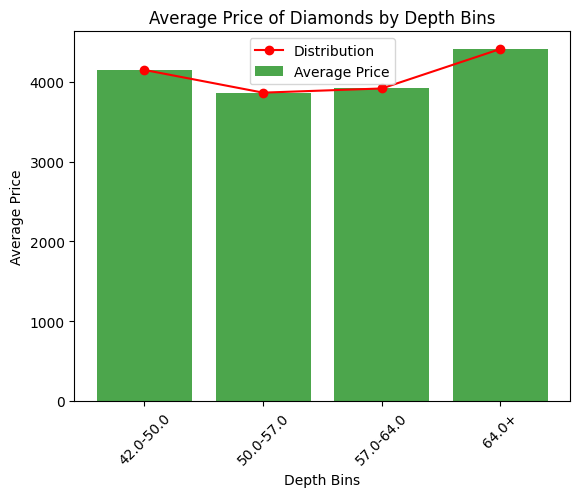

In [56]:
#Let's look at chart average price and depth bins
depth_bins = list(average_prices_by_depthbin.keys())
average_depths_pr = list(dict(average_prices_by_depthbin).values())
plt.bar(depth_bins, average_depths_pr, color='green', alpha=0.7, label='Average Price')
plt.plot(depth_bins, average_depths_pr, marker='o', linestyle='-', color='red', label='Distribution')
plt.xlabel('Depth Bins')
plt.ylabel('Average Price')
plt.title('Average Price of Diamonds by Depth Bins')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [57]:
#Let's create new features
map_dict1 = {'42.0-50.0':3,'50.0-57.0':1,'57.0-64.0':2,'64.0+':4}
df['depth_label'] = df['depth_bin'].map(map_dict1)

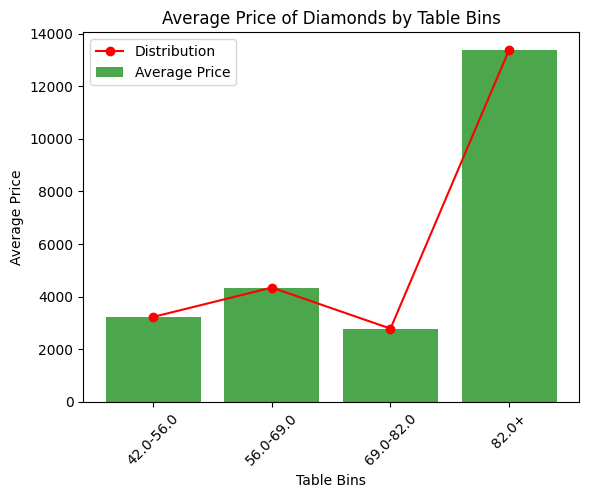

In [58]:
#Let's look at chart average price and Table bins
table_bins = list(average_prices_by_tablebin.keys())
average_tables_pr = list(dict(average_prices_by_tablebin).values())
plt.bar(table_bins, average_tables_pr, color='green', alpha=0.7, label='Average Price')
plt.plot(table_bins, average_tables_pr, marker='o', linestyle='-', color='red', label='Distribution')
plt.xlabel('Table Bins')
plt.ylabel('Average Price')
plt.title('Average Price of Diamonds by Table Bins')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [59]:
#Let's create new features
map_dict1 = {'42.0-56.0':2,'56.0-69.0':3,'69.0-82.0':1,'82.0+':4}
df['table_label'] = df['table_bin'].map(map_dict1)

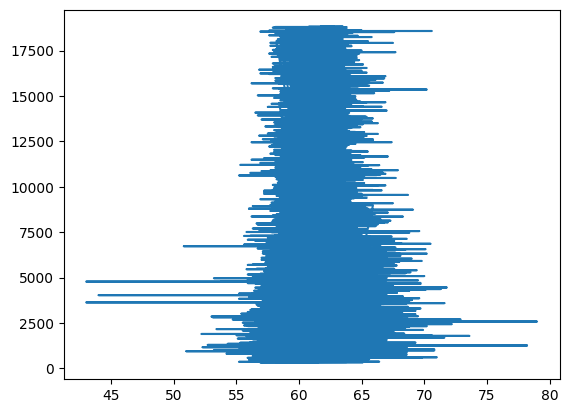

In [60]:
#Let's examine relation between depth and price
plt.plot(df['depth'],df['price'])

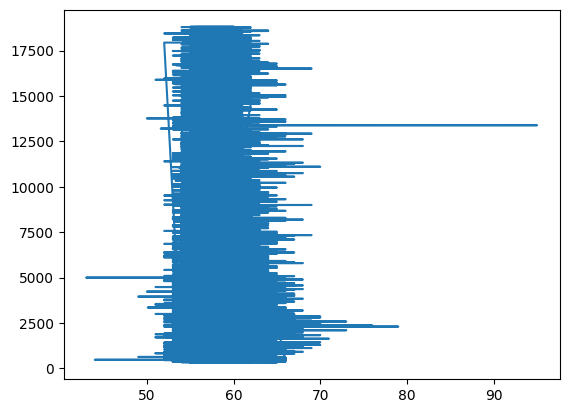

In [61]:
#Let's examine relation between table and price
plt.plot(df['table'],df['price'])

In [62]:
#Let's delete categorical features
del df['carat_bin']
del df['depth_bin']
del df['table_bin']

In [63]:
#Let's convert categories features to numeric
df[['depth_label','carat_label','table_label']] = df[['depth_label','carat_label','table_label']].astype('int')

### Volume (cubic millimeters):

In [64]:
#Let's calculate Volume (cubic millimeters)
df['Volume'] = df['x'] * df['y'] * df['z']

### Density (carat per cubic millimeter)

In [65]:
#Let's calculate Density (carat per cubic millimeter)
df['density'] = df['carat'] / df['Volume']

### Diagonal Length (mm)

In [66]:
#Let's calculate Diagonal Length (mm) (Calculate the diagonal length of the diamond using the Pythagorean theorem)
df['diagonal'] = np.sqrt(df['x']**2  + df['y']**2 + df['z']**2)

### Average Dimension (mm)

In [67]:
#Let's calculate Average Dimension (mm)
df['avg_dimension'] = (df['x'] + df['y'] + df['z'])/3

### Table Percentage

In [68]:
#Let's calculate Table Percentage ((table / (x + y)) * 100)
df['table_percentage'] = df['table']/(df['x']+df['y'])

### Depth Percentage

In [69]:
#Let's calculate Depth Percentage
df['depth_percentage'] = df['depth']/(df['x']+df['y'])

### Length-to-Width Ratio

In [70]:
#Let's calculate Length-to-Width Ratio
df['Length_Width_Ratio'] = df['x']/df['y']

### Data Manipulation

In [71]:
#Let's determine some columns
columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_num', 'carat_label',
       'depth_label', 'table_label', 'Volume', 'density', 'diagonal',
       'avg_dimension', 'table_percentage', 'depth_percentage',
       'Length_Width_Ratio']

In [72]:
#Let's calculate power of features
for i in columns:
  df[f'pow_{i}'] = df[i]**2
  corr = np.abs(df[f'pow_{i}'].corr(df['price']))
  corr_i = np.abs(df[i].corr(df['price']))
  if corr > corr_i:
    print(f'pow_{i} ==> Before: {corr_i} | After: {corr}')
  else:
    del df[f'pow_{i}']

pow_x ==> Before: 0.8844327693553325 | After: 0.9085670825159579
pow_depth_label ==> Before: 0.022527469903479164 | After: 0.022697316006112037
pow_table_label ==> Before: 0.1353150884119672 | After: 0.13537241871926967
pow_Length_Width_Ratio ==> Before: 0.07459657259375407 | After: 0.08015735933433167


In [73]:
#Let's calculate sqrt of features
for i in columns:
  df[f'sqrt_{i}'] = df[i]**(1/2)
  corr = np.abs(df[f'sqrt_{i}'].corr(df['price']))
  corr_i = np.abs(df[i].corr(df['price']))
  if corr > corr_i:
    print(f'sqrt_{i} ==> Before: {corr_i} | After: {corr}')
  else:
    del df[f'sqrt_{i}']

sqrt_depth ==> Before: 0.010630071383169055 | After: 0.011067559205051388
sqrt_table ==> Before: 0.12711786119376697 | After: 0.1279950413716611
sqrt_carat_label ==> Before: 0.761196925991398 | After: 0.7623751054461638


In [74]:
#Let's calculate log of features
for i in columns:
  df[f'log_{i}'] = np.log(df[i])
  corr = np.abs(df[f'log_{i}'].corr(df['price']))
  corr_i = np.abs(df[i].corr(df['price']))
  if corr > corr_i:
    print(f'log_{i} ==> Before: {corr_i} | After: {corr}')
  else:
    del df[f'log_{i}']

log_depth ==> Before: 0.010630071383169055 | After: 0.011498736298176784
log_table ==> Before: 0.12711786119376697 | After: 0.1288105087480055
log_carat_label ==> Before: 0.761196925991398 | After: 0.7629390212286347


### Correlation

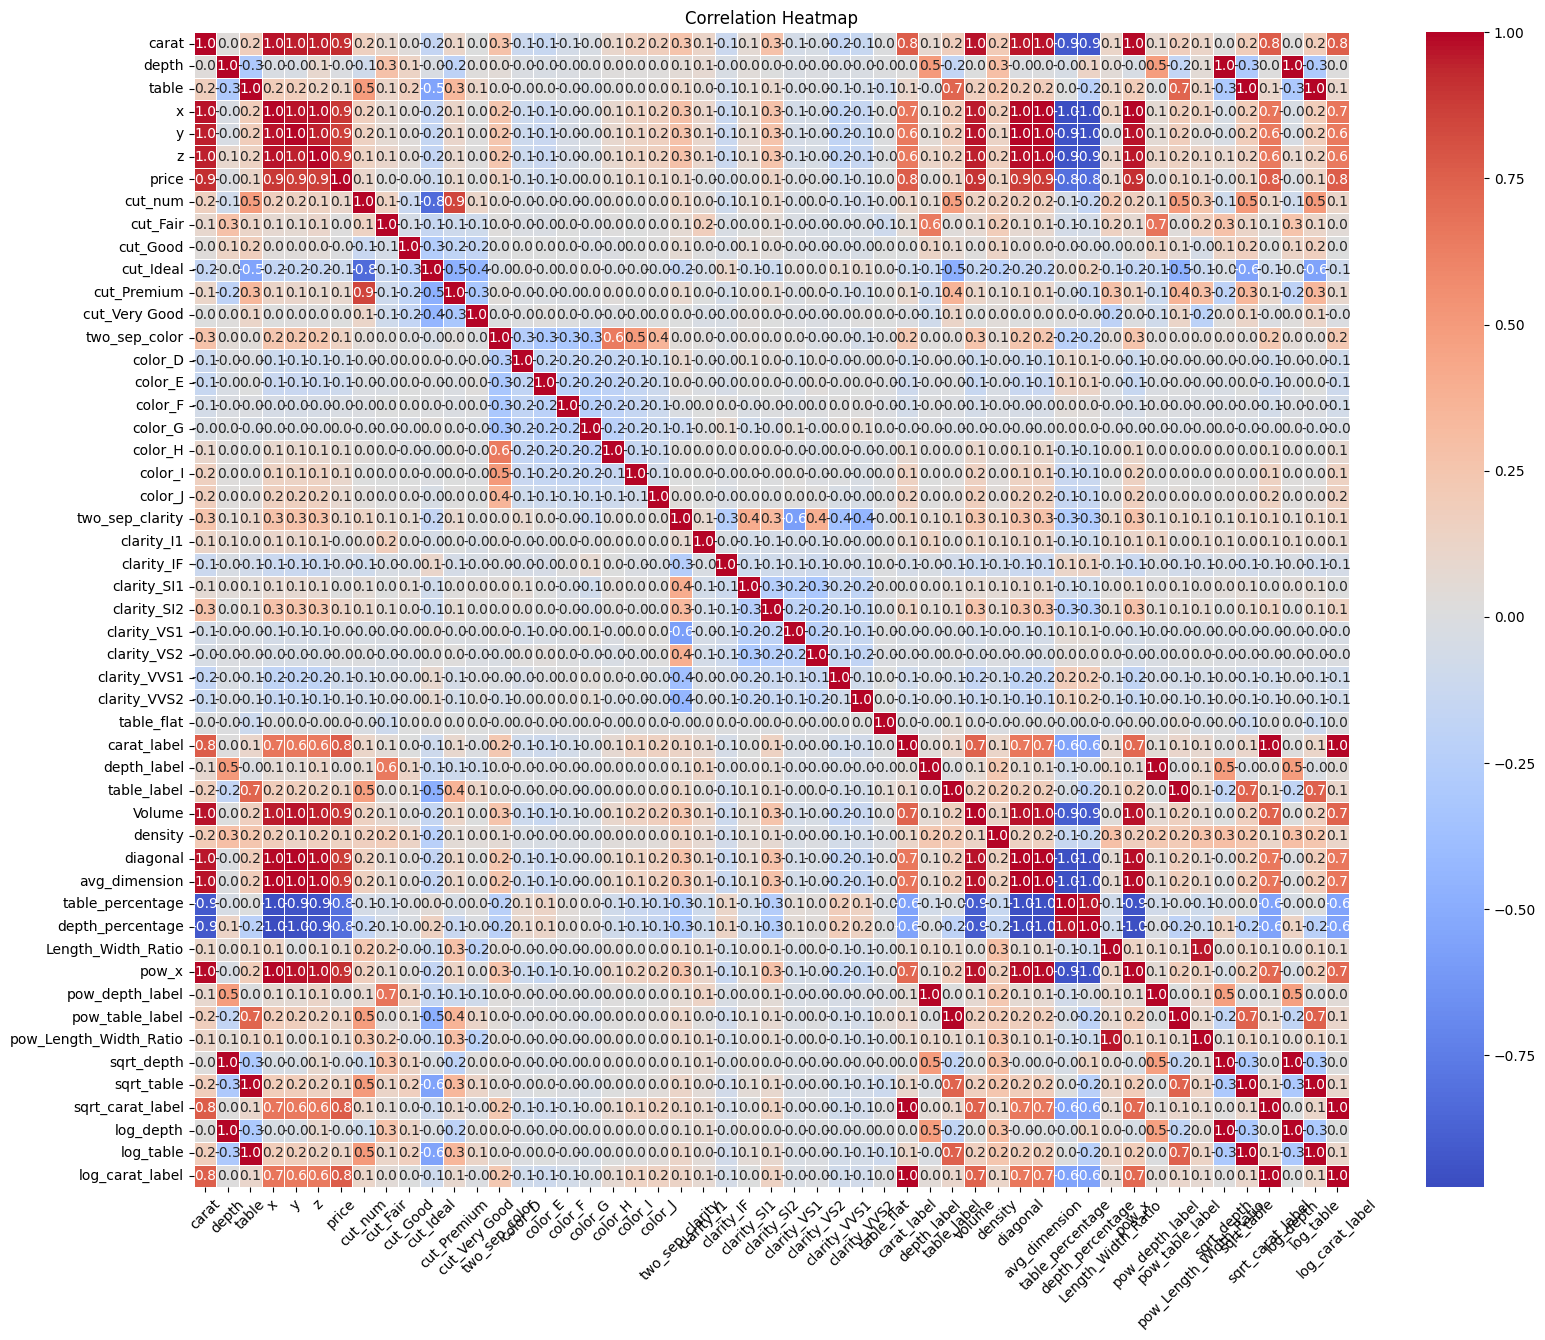

In [75]:
#Let's create heatmap and look at relation
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".1f", square=True)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

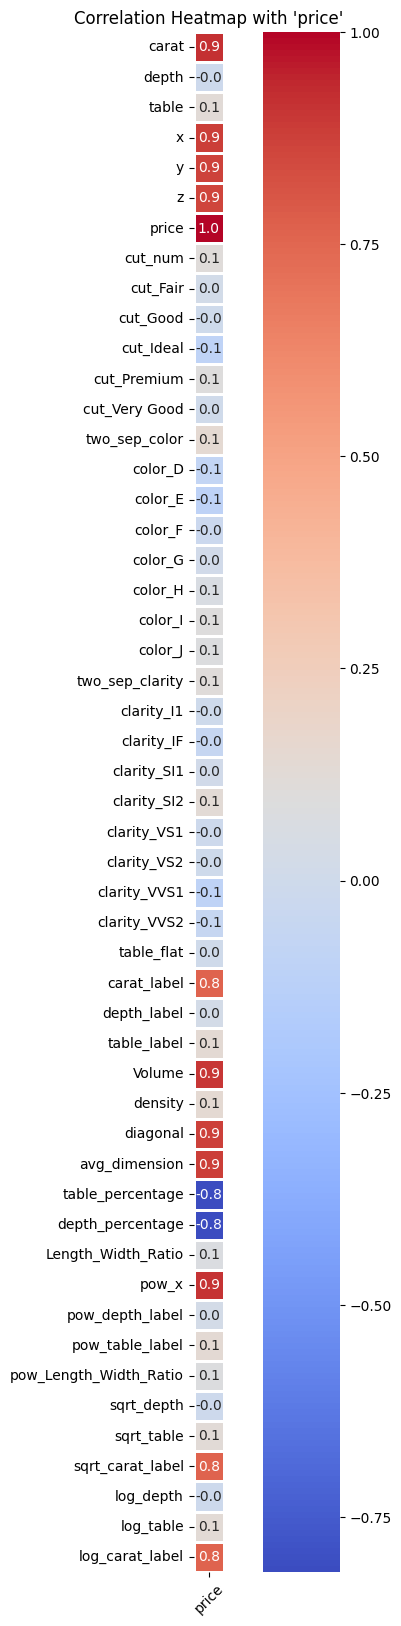

In [76]:
#Let's create heatmap only for price column and look at relation with other columns
correlation_matrix = df.corr()['price'].to_frame()
plt.figure(figsize=(10, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=1, fmt=".1f", square=True)
plt.title("Correlation Heatmap with 'price'")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

In [77]:
#Let's find the columns with low correlation with the target variable
low_corr_cols = ['depth',
 'table',
 'cut_num',
 'cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J', 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [78]:
#Let's look at null values
df.isnull().sum()

carat                     0
depth                     0
table                     0
x                         0
y                         0
z                         0
price                     0
cut_num                   0
cut_Fair                  0
cut_Good                  0
cut_Ideal                 0
cut_Premium               0
cut_Very Good             0
two_sep_color             0
color_D                   0
color_E                   0
color_F                   0
color_G                   0
color_H                   0
color_I                   0
color_J                   0
two_sep_clarity           0
clarity_I1                0
clarity_IF                0
clarity_SI1               0
clarity_SI2               0
clarity_VS1               0
clarity_VS2               0
clarity_VVS1              0
clarity_VVS2              0
table_flat                0
carat_label               0
depth_label               0
table_label               0
Volume                    0
density             

In [79]:
#Let's examine reason of null
df[df['Length_Width_Ratio'].isnull()]

,carat,depth,table,x,y,z,price,cut_num,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,two_sep_color,color_D,color_E,color_F,color_G,color_H,color_I,color_J,two_sep_clarity,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,table_flat,carat_label,depth_label,table_label,Volume,density,diagonal,avg_dimension,table_percentage,depth_percentage,Length_Width_Ratio,pow_x,pow_depth_label,pow_table_label,pow_Length_Width_Ratio,sqrt_depth,sqrt_table,sqrt_carat_label,log_depth,log_table,log_carat_label
11963,1.00,63.3,53.0,0.0,0.0,0.0,5139,3,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,2,2,0.0,inf,0.0,0.0,inf,inf,NaN,0.0,4,4,NaN,7.956130,7.280110,1.000000,4.147885,3.970292,0.000000
15951,1.14,57.5,67.0,0.0,0.0,0.0,6381,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2,3,0.0,inf,0.0,0.0,inf,inf,NaN,0.0,4,9,NaN,7.582875,8.185353,1.000000,4.051785,4.204693,0.000000
24520,1.56,62.2,54.0,0.0,0.0,0.0,12800,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,2,2,2,0.0,inf,0.0,0.0,inf,inf,NaN,0.0,4,4,NaN,7.886698,7.348469,1.414214,4.130355,3.988984,0.693147
26243,1.20,62.1,59.0,0.0,0.0,0.0,15686,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,3,0.0,inf,0.0,0.0,inf,inf,NaN,0.0,4,9,NaN,7.880355,7.681146,1.000000,4.128746,4.077537,0.000000
27429,2.25,62.8,59.0,0.0,0.0,0.0,18034,5,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,2,2,3,0.0,inf,0.0,0.0,inf,inf,NaN,0.0,4,9,NaN,7.924645,7.681146,1.414214,4.139955,4.077537,0.693147
49556,0.71,64.1,60.0,0.0,0.0,0.0,2130,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,4,3,0.0,inf,0.0,0.0,inf,inf,NaN,0.0,16,9,NaN,8.006248,7.745967,1.000000,4.160444,4.094345,0.000000
49557,0.71,64.1,60.0,0.0,0.0,0.0,2130,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,4,3,0.0,inf,0.0,0.0,inf,inf,NaN,0.0,16,9,NaN,8.006248,7.745967,1.000000,4.160444,4.094345,0.000000


In [80]:
#Reason X = 0 & Y = 0 and divide = null
#Let's replace with zero
df.fillna(0 , inplace = True)

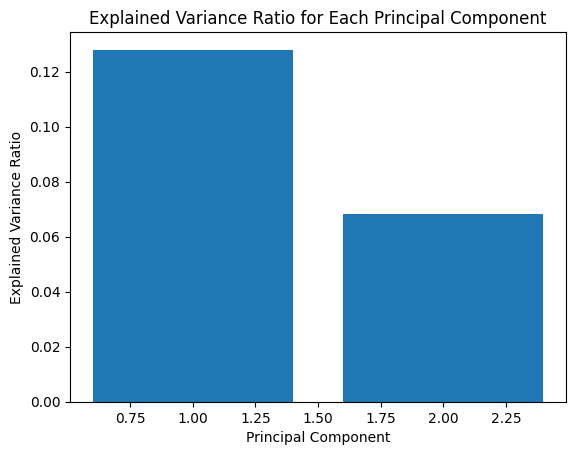

In [81]:
#Let's use PCA for creating new features and dimesion reduction
X = df[low_corr_cols]
y = df['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, n_components + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')

plt.show()

In [82]:
#Let's add new pca columns
df['pca_1'] = X_pca[:,0]
df['pca_2'] = X_pca[:,1]

In [83]:
#Let's remove low correlation columns
df.drop(low_corr_cols , axis = 1 , inplace = True)

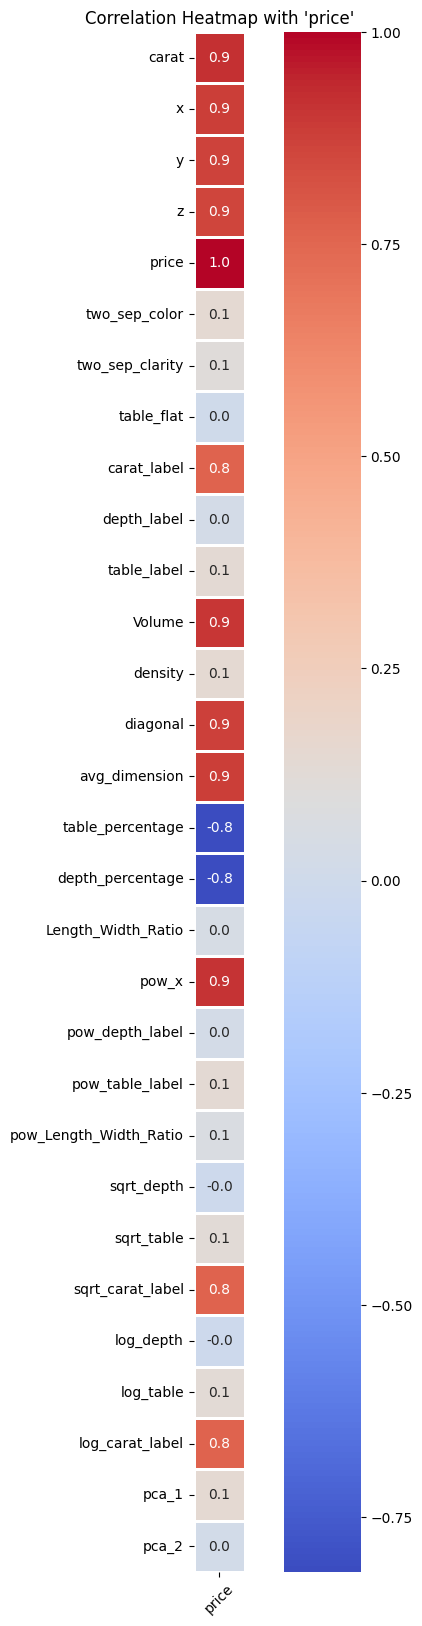

In [84]:
#Let's create heatmap only for price column and look at relation with other columns
correlation_matrix = df.corr()['price'].to_frame()
plt.figure(figsize=(10, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=1, fmt=".1f", square=True)
plt.title("Correlation Heatmap with 'price'")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

In [85]:
#Let's examine inf values
for column in df.drop(columns = 'price').columns:
    inf_rows = df[df[column] == np.inf]
    if not inf_rows.empty:
        print(f"Rows with 'np.inf' in column '{column}':")
        print(inf_rows)

Rows with 'np.inf' in column 'density':
       carat     x     y    z  price  two_sep_color  two_sep_clarity  \
2207    1.00  6.55  6.48  0.0   3142              0                1   
2314    1.01  6.66  6.60  0.0   3167              1                1   
4791    1.10  6.50  6.47  0.0   3696              0                1   
5471    1.01  6.50  6.47  0.0   3837              0                1   
10167   1.50  7.15  7.04  0.0   4731              0                1   
11182   1.07  0.00  6.62  0.0   4954              0                1   
11963   1.00  0.00  0.00  0.0   5139              1                1   
13601   1.15  6.88  6.83  0.0   5564              0                1   
15951   1.14  0.00  0.00  0.0   6381              0                0   
24394   2.18  8.49  8.45  0.0  12631              1                1   
24520   1.56  0.00  0.00  0.0  12800              0                1   
26123   2.25  8.52  8.42  0.0  15397              1                1   
26243   1.20  0.00  0.00

In [86]:
#Let's find count of rows which have inf values
inf_rows = df[df.isin([np.inf, -np.inf]).any(axis=1)]
inf_row_count = len(inf_rows)
print(f"Number of rows with np.inf values: {inf_row_count}")

Number of rows with np.inf values: 20


In [87]:
#Let's drop rows which contain inf values
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]
df.reset_index(drop=True, inplace=True)

In [88]:
#Let's look at vif score of columns
X = df.drop(columns=['price'])
y = df['price']
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)

                  Variable           VIF
0                    const  1.754913e+08
1                    carat  1.930109e+03
2                        x           inf
3                        y           inf
4                        z           inf
5            two_sep_color  1.120243e+00
6          two_sep_clarity  1.348350e+00
7               table_flat  2.114884e+01
8              carat_label  6.050024e+05
9              depth_label  1.824317e+02
10             table_label  1.057759e+05
11                  Volume  7.235058e+02
12                 density  6.699458e+00
13                diagonal  4.188360e+04
14           avg_dimension           inf
15        table_percentage  5.321282e+02
16        depth_percentage  1.140120e+03
17      Length_Width_Ratio  2.347622e+02
18                   pow_x  1.965598e+04
19         pow_depth_label  1.862680e+02
20         pow_table_label  1.053943e+05
21  pow_Length_Width_Ratio  1.388498e+02
22              sqrt_depth  6.155328e+03
23              

### Normalization


In [89]:
#Let's look at columns
df.columns

Index(['carat', 'x', 'y', 'z', 'price', 'two_sep_color', 'two_sep_clarity',
       'table_flat', 'carat_label', 'depth_label', 'table_label', 'Volume',
       'density', 'diagonal', 'avg_dimension', 'table_percentage',
       'depth_percentage', 'Length_Width_Ratio', 'pow_x', 'pow_depth_label',
       'pow_table_label', 'pow_Length_Width_Ratio', 'sqrt_depth', 'sqrt_table',
       'sqrt_carat_label', 'log_depth', 'log_table', 'log_carat_label',
       'pca_1', 'pca_2'],
      dtype='object')

In [90]:
#First 5 rows of Data
df.head()

,carat,x,y,z,price,two_sep_color,two_sep_clarity,table_flat,carat_label,depth_label,table_label,Volume,density,diagonal,avg_dimension,table_percentage,depth_percentage,Length_Width_Ratio,pow_x,pow_depth_label,pow_table_label,pow_Length_Width_Ratio,sqrt_depth,sqrt_table,sqrt_carat_label,log_depth,log_table,log_carat_label,pca_1,pca_2
0,0.23,3.95,3.98,2.43,326,0,1,1,1,2,2,38.202030,0.006021,6.111285,3.453333,6.935687,7.755359,0.992462,15.6025,4,4,0.984981,7.842194,7.416198,1.0,4.119037,4.007333,0.0,-1.687415,-0.039117
1,0.21,3.89,3.84,2.31,326,0,1,1,1,2,3,34.505856,0.006086,5.934122,3.346667,7.891332,7.736093,1.013021,15.1321,4,9,1.026211,7.733046,7.810250,1.0,4.091006,4.110874,0.0,2.833995,-0.846326
2,0.23,4.05,4.07,2.31,327,0,0,1,1,1,3,38.076885,0.006040,6.188982,3.476667,8.004926,7.007389,0.995086,16.4025,1,9,0.990196,7.543209,8.062258,1.0,4.041295,4.174387,0.0,1.576871,-0.669554
3,0.29,4.20,4.23,2.63,334,1,1,1,1,2,3,46.724580,0.006207,6.515351,3.686667,6.880190,7.402135,0.992908,17.6400,4,9,0.985866,7.899367,7.615773,1.0,4.133565,4.060443,0.0,1.973850,-0.887832
4,0.31,4.34,4.35,2.75,335,1,1,1,1,2,3,51.917250,0.005971,6.732058,3.813333,6.674338,7.284235,0.997701,18.8356,4,9,0.995408,7.956130,7.615773,1.0,4.147885,4.060443,0.0,0.353913,2.367362


In [91]:
#Let's normalize columns
#columns = ['x','y','z','price','Volume','diagonal','avg_dimension','table_percentage','depth_percentage','pow_x','pca_1','pca_2']
scaler = StandardScaler()
X = df
scaler.fit(X)
X_standardized = scaler.transform(X)

In [92]:
#Let's create normalize data
df_normalize = pd.DataFrame(X_standardized ,columns = df.columns)
df_normalize

,carat,x,y,z,price,two_sep_color,two_sep_clarity,table_flat,carat_label,depth_label,table_label,Volume,density,diagonal,avg_dimension,table_percentage,depth_percentage,Length_Width_Ratio,pow_x,pow_depth_label,pow_table_label,pow_Length_Width_Ratio,sqrt_depth,sqrt_table,sqrt_carat_label,log_depth,log_table,log_carat_label,pca_1,pca_2
0,-1.198226,-1.591618,-1.539262,-1.580121,-0.904138,-0.664790,0.728035,0.017228,-0.386209,-0.176149,-1.305009,-1.172312,-0.600040,-1.573043,-1.584341,1.790595,2.014717,-0.596861,-1.380986,-0.183425,-1.306154,-0.605287,-0.168305,-1.109486,-0.387088,-0.162352,-1.118629,-0.38759,-0.983230,-0.031243
1,-1.240439,-1.645219,-1.662060,-1.750938,-0.904138,-0.664790,0.728035,0.017228,-0.386209,-0.176149,0.764210,-1.219567,-0.232610,-1.674866,-1.693452,2.772710,1.996793,1.165418,-1.416097,-0.183425,0.764467,1.176583,-1.364482,1.582252,-0.387088,-1.367087,1.577530,-0.38759,1.652025,-0.675968
2,-1.198226,-1.502283,-1.460321,-1.750938,-0.903887,-0.664790,-1.373561,0.017228,-0.386209,-2.866178,0.764210,-1.173912,-0.488701,-1.528387,-1.560473,2.889450,1.318843,-0.371959,-1.321275,-1.544112,0.764467,-0.379918,-3.444957,3.303703,-0.387088,-3.503529,3.231394,-0.38759,0.919324,-0.534779
3,-1.071584,-1.368281,-1.319980,-1.295425,-0.902132,1.504235,0.728035,0.017228,-0.386209,-0.176149,0.764210,-1.063351,0.446309,-1.340809,-1.345662,1.733560,1.686095,-0.558674,-1.228908,-0.183425,0.764467,-0.567062,0.458275,0.253795,-0.387088,0.462034,0.264330,-0.38759,1.150699,-0.709120
4,-1.029370,-1.243211,-1.214725,-1.124608,-0.901881,1.504235,0.728035,0.017228,-0.386209,-0.176149,0.764210,-0.996963,-0.879024,-1.216259,-1.216093,1.522007,1.576406,-0.147787,-1.139669,-0.183425,0.764467,-0.154689,1.080352,0.253795,-0.387088,1.077479,0.264330,-0.38759,0.206536,1.890833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53918,0.131510,0.373753,0.337793,0.284636,-0.294428,1.504235,0.728035,0.017228,-0.386209,-0.176149,0.764210,0.138965,-0.100375,0.344699,0.342145,-0.479295,-0.575269,0.469467,0.277505,-0.183425,0.764467,0.468531,-0.518386,0.253795,-0.387088,-0.513194,0.264330,-0.38759,1.403511,-0.528416
53919,-0.100666,0.087881,0.118511,0.142288,-0.294428,-0.664790,0.728035,0.017228,-0.386209,-0.176149,-1.305009,-0.068121,-0.599117,0.109378,0.113694,-0.506140,-0.254517,-0.534853,-0.008634,-0.183425,-1.306154,-0.543209,0.319427,-1.109486,-0.387088,0.324063,-1.118629,-0.38759,-1.023875,0.350733
53920,-0.185093,0.052147,0.004484,-0.071234,-0.294679,-0.664790,0.728035,0.017228,-0.386209,-0.176149,-1.305009,-0.177812,-0.033651,0.011691,0.004584,-0.434910,-0.318766,0.795962,-0.043326,-0.183425,-1.306154,0.799993,-0.869906,-1.109486,-0.387088,-0.866923,-1.118629,-0.38759,0.979884,-0.528455
53921,-0.185093,0.007479,-0.004287,-0.156643,-0.294679,-0.664790,0.728035,0.017228,-0.386209,-0.176149,0.764210,-0.218409,0.935811,-0.024287,-0.036333,0.217926,-0.350007,0.198869,-0.086356,-0.183425,0.764467,0.194766,-1.364482,2.017780,-0.387088,-1.367087,2.000947,-0.38759,1.748995,-0.617578


In [93]:
#Let's look at 0.9+ correlation columns
for i in df.columns:
  for y in df.columns:
     if i>y:
        corr = df[i].corr(df[y])
        if np.abs(corr) > 0.90:
          print(i,"  |  ",y,"  ==> ",corr)

carat   |   Volume   ==>  0.978280369711637
carat   |   avg_dimension   ==>  0.9742475495323754
x   |   carat   ==>  0.9777774541683368
x   |   Volume   ==>  0.9585320582058104
x   |   diagonal   ==>  0.9887812668445582
x   |   avg_dimension   ==>  0.9943112780917387
x   |   table_percentage   ==>  -0.9607099430602589
x   |   depth_percentage   ==>  -0.975588284943456
x   |   pow_x   ==>  0.995011314225405
y   |   carat   ==>  0.9539896660964736
y   |   x   ==>  0.9749182352560958
y   |   Volume   ==>  0.977014533596064
y   |   diagonal   ==>  0.9939269004929241
y   |   avg_dimension   ==>  0.9900111316227098
y   |   table_percentage   ==>  -0.9431986623182816
y   |   depth_percentage   ==>  -0.9567304790608235
y   |   pow_x   ==>  0.9700211499502439
z   |   carat   ==>  0.9610474015200041
z   |   x   ==>  0.9754346356453218
z   |   y   ==>  0.9567433407207008
z   |   Volume   ==>  0.9519121274761618
z   |   diagonal   ==>  0.9812971607070031
z   |   avg_dimension   ==>  0.983754260705

In [114]:
#Function for finding accuracy score
def gbost(df_normalize):
  X = df_normalize.drop(columns=['price'])
  y = df_normalize['price']
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # Create an XGBoost regression model
  xgb_model = XGBRegressor(
      objective='reg:squarederror',  # Specify regression as the objective
      n_estimators=150,  # Number of boosting rounds
      max_depth=5,  # Maximum tree depth
      learning_rate=0.1,  # Learning rate
      random_state=42  # Random seed for reproducibility
  )
  # Fit the model to the training data
  xgb_model.fit(X_train, y_train)
  # Make predictions on the test data
  y_pred = xgb_model.predict(X_test)
  # Evaluate the model's performance using regression metrics
  mse = mean_squared_error(y_test, y_pred)
  print(f'Mean Squared Error (MSE): {mse}')
  r2 = r2_score(y_test, y_pred)
  print(f'R-squared (R2) Score: {r2}')
  mae = mean_absolute_error(y_test, y_pred)
  print(f'Mean Absolute Error (MAE): {mae}')

In [95]:
#Let's look at accuracy for all probability
df_normalize1 = df_normalize.copy()
columns = ['depth_percentage' , 'y','z','diagonal','table_percentage','pow_x','sqrt_carat_label','carat_label']
#'pca_2','x','avg_dimension',avg_dimension,'Volume'
for i in columns[::-1]:
  print(f'Before : {i}')
  print(gbost(df_normalize1))
  del df_normalize1[i]

Before : carat_label
Mean Squared Error (MSE): 0.04597426927668211
R-squared (R2) Score: 0.9540810674930412
Mean Absolute Error (MAE): 0.1176169853081222
None
Before : sqrt_carat_label
Mean Squared Error (MSE): 0.04597426927668211
R-squared (R2) Score: 0.9540810674930412
Mean Absolute Error (MAE): 0.1176169853081222
None
Before : pow_x
Mean Squared Error (MSE): 0.04597426927668211
R-squared (R2) Score: 0.9540810674930412
Mean Absolute Error (MAE): 0.1176169853081222
None
Before : table_percentage
Mean Squared Error (MSE): 0.04597426927668211
R-squared (R2) Score: 0.9540810674930412
Mean Absolute Error (MAE): 0.1176169853081222
None
Before : diagonal
Mean Squared Error (MSE): 0.046257475327629874
R-squared (R2) Score: 0.9537982023220741
Mean Absolute Error (MAE): 0.11801287473568163
None
Before : z
Mean Squared Error (MSE): 0.04569534550190278
R-squared (R2) Score: 0.9543596555421866
Mean Absolute Error (MAE): 0.11709896573617129
None
Before : y
Mean Squared Error (MSE): 0.0455007338308

In [96]:
#Let's remove unnecessary columns (intracorrelation)
columns = ['Volume','avg_dimension','x', 'y','z','diagonal','table_percentage','pow_x','sqrt_carat_label','carat_label']
for i in columns[::-1]:
  del df_normalize[i]

### Linear Regression

In [116]:
#Linear Regression
X = df_normalize.drop(columns=['price'])
y = df_normalize['price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
# Evaluate the model's performance using regression metrics
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.09949799647973495
R-squared (R2) Score: 0.9006217639385545
Mean Absolute Error (MAE): 0.20330006950771412


### Ridge Regression

In [117]:
# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
# Calculate some metrics to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print('R-squared (R2) Score: ',r2)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE): ',mae)

Mean Squared Error: 0.09951059431812938
R-squared (R2) Score:  0.9006091812635045
Mean Absolute Error (MAE):  0.20329885941005196


### XGBoost

In [123]:
# Create an XGBoost regression model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=150,
    max_depth=5,
    learning_rate=0.2,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
# Evaluate the model's performance using regression metrics
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.042883353683799606
R-squared (R2) Score: 0.9571682627160931
Mean Absolute Error (MAE): 0.11347814162965339


In [100]:
X.iloc[23]
price = y.iloc[23]
price = price * df.price.std() +  df.price.mean()
price

352.9668232698118

In [101]:
new = [-1.029370 , 1.504235 ,  0.728035,  0.017228 ,  -0.176149 , 0.764210, -0.243200, 1.065141 , -0.724726 , -0.183425 , 0.764467 , -0.733152 , -1.648397 , 2.017780,-1.655530 , 2.000947,-0.387590 , 1.024883 , 0.723817]
# Assuming 'new' is a list
new_data = np.array([new])  # Convert the list to a NumPy array

# Make predictions using the XGBoost model
result = xgb_model.predict(new_data)
print("Predicted Result:", result)

Predicted Result: [-0.9468904]


### Gradient Boosting

In [102]:
# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Learning rate
    max_depth=5,  # Maximum tree depth
    random_state=42  # Random seed for reproducibility
)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
# Evaluate the model's performance using regression metrics
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.04708160271057517
R-squared (R2) Score: 0.9529750668971944
Mean Absolute Error (MAE): 0.11971892931236289


### Hyperparameter

In [103]:

#Let's find the best parameters
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}
# Create an XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42
)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
# Evaluate the model's performance using regression metrics
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

KeyboardInterrupt: ignored

In [ ]:
# Create an XGBoost regression model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=5,
    learning_rate=0.2,
    random_state=42,
    min_child_weight =  4,
    subsample = 0.7,
    colsample_bytree = 1.0
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
# Evaluate the model's performance using regression metrics
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

In [124]:
#Let's predict two diamond price and check model as manually
new = np.array([[-1.240439,-0.664790,0.728035,0.017228,-0.176149 , 0.764210,-0.232610,
        1.996793,1.165418,-0.183425,0.764467,1.176583,-1.364482,1.582252,
       -1.367087,1.577530, -0.387590, 1.652025,-0.675968]])

new1 = np.array([[-1.029370,1.504235,0.728035,0.017228,-0.176149,0.764210,
                  -0.879024,1.576406,-0.147787,-0.183425,0.764467,-0.154689,
                  1.080352,0.253795,1.077479,0.264330,-0.38759,0.206536,1.890833]])

y_pred = xgb_model.predict(new)
y_pred1 = xgb_model.predict(new)

In [130]:
#Let's compare model prediction and actual values
print(f'·Model Predict: {round(float(y_pred),2)} | · Actual Value: {round(y.iloc[1],2)}')
print(f'·Model Predict: {round(float(y_pred1),2)} | · Actual Value: {round(y.iloc[4],2)}')

·Model Predict: -0.88 | · Actual Value: -0.9
·Model Predict: -0.88 | · Actual Value: -0.9


In [ ]:
# Let's look at the changes in the data frame
# ------------------------------------------------
# before - df:  #'carat', 'cut', 'color','clarity',
                #'depth','x','y','z','price'
# ---------------------------------------------------------
# after  - df:  #'carat', 'density', 'depth_percentage',
                #'pca_2', 'log_carat_label', 'pca_1','price'

In [ ]:
# Adding Columns: #'density'              - df['carat'] / df['Volume']
                  #'depth_percentage'     - df['depth']/(df['x']+df['y'])
                  #'log_carat_label'      - log of carat_label ==> carat_label
# ===============================================================
# map_dict1 = {'0.1-1.3':1,'1.3-2.7':2,'2.7-4.5':3,'4.5+':4}
# df['carat_label'] = df['carat_bin'].map(map_dict1)
# bins = [0.1, 1.3, 2.7, 4, 5.02]
# labels = ['0.1-1.3', '1.3-2.7', '2.7-4.5', '4.5+']
# df['carat_bin'] = pd.cut(df['carat'], bins=bins, labels=labels)
# ===============================================================
                  #'pca_1'                - PCA 1
# =================================================================

# =================================================================
                  #'pca_2'                - PCA 2